# Simple Linear Regression

Welcome to the Simple Linear Regression module! This notebook will provide you with a comprehensive understanding of one of the most fundamental algorithms in machine learning and statistics.

## Learning Objectives

By the end of this notebook, you will understand:
- The concept of regression lines and best fit lines
- Key assumptions underlying simple linear regression
- How to implement linear regression from scratch and using scikit-learn
- How to perform hypothesis testing in linear regression
- How to build, evaluate, and interpret linear models
- How to conduct residual analysis and make predictions

## Understanding Regression Fundamentals

### What is a Regression Line?

A **regression line** (also called a trend line) is a straight line that represents the relationship between two variables in a dataset. It shows the general direction and strength of the linear relationship between:
- **Independent variable (X)**: The predictor or feature variable
- **Dependent variable (Y)**: The target or response variable

The regression line helps us:
- Understand the relationship between variables
- Make predictions for new data points
- Quantify the strength of the relationship

### The Best Fit Line

The **best fit line** is the specific regression line that minimizes the sum of squared differences between the actual data points and the predicted values on the line. This is found using the **Ordinary Least Squares (OLS)** method.

#### Mathematical Representation:
The equation of a simple linear regression line is:

**Y = β₀ + β₁X + ε**

Where:
- **Y**: Dependent variable (what we're trying to predict)
- **X**: Independent variable (predictor)
- **β₀**: Y-intercept (value of Y when X = 0)
- **β₁**: Slope (change in Y for a unit change in X)
- **ε**: Error term (residual)

#### How the Best Fit Line is Found:
1. **Minimize Sum of Squared Errors (SSE)**: Find the line that minimizes Σ(yᵢ - ŷᵢ)²
2. **Calculate Optimal Parameters**: 
   - β₁ = Σ((xᵢ - x̄)(yᵢ - ȳ)) / Σ((xᵢ - x̄)²)
   - β₀ = ȳ - β₁x̄

### Key Assumptions of Simple Linear Regression

For linear regression to provide reliable and valid results, several important assumptions must be met:

#### 1. **Linearity**
- The relationship between X and Y must be linear
- The change in Y should be proportional to the change in X
- **Violation Impact**: Non-linear relationships will be poorly modeled
- **Check**: Scatter plots, residual plots

#### 2. **Independence of Observations**
- Each observation should be independent of others
- No autocorrelation between residuals
- **Violation Impact**: Inflated significance tests, unreliable confidence intervals
- **Check**: Durbin-Watson test, residual plots over time

#### 3. **Homoscedasticity (Constant Variance)**
- The variance of residuals should be constant across all levels of X
- Equal spread of residuals around the regression line
- **Violation Impact**: Inefficient estimates, invalid hypothesis tests
- **Check**: Residual vs. fitted plots, Breusch-Pagan test

#### 4. **Normality of Residuals**
- Residuals should be normally distributed
- Important for hypothesis testing and confidence intervals
- **Violation Impact**: Invalid p-values and confidence intervals
- **Check**: Q-Q plots, Shapiro-Wilk test, histogram of residuals

#### 5. **No Multicollinearity** (for multiple regression)
- In simple linear regression, this isn't applicable
- Becomes important when we have multiple predictors

#### 6. **No Extreme Outliers**
- Outliers can significantly influence the regression line
- **Impact**: Biased estimates, reduced model accuracy
- **Check**: Leverage plots, Cook's distance, standardized residuals

### When to Use Simple Linear Regression

**Best suited for:**
- Continuous target variables
- Linear relationships between variables
- Small to medium-sized datasets
- When interpretability is important
- As a baseline model for comparison

**Not suitable for:**
- Non-linear relationships
- Categorical target variables (use logistic regression instead)
- When assumptions are severely violated
- Complex relationships requiring multiple predictors

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__ if 'sklearn' in globals() else 'Imported but version not displayed'}")

Libraries imported successfully!
Versions:
NumPy: 2.3.4
Pandas: 2.3.3
Matplotlib: 3.10.7
Seaborn: 0.13.2
Scikit-learn: Imported but version not displayed


## Loading and Understanding the Data

We'll use the California Housing dataset from scikit-learn, which contains information about housing districts in California. For our simple linear regression, we'll focus on the relationship between median income and median house value.

In [5]:
# Load the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

# Display basic information about the dataset
print("Dataset Information:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nFeatures: {list(california_housing.feature_names)}")
print(f"Target: Median house value (in hundreds of thousands of dollars)")

print(f"\nDataset Description:")
print(california_housing.DESCR[:500] + "...")

Dataset Information:
Shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in hundreds of thousands of dollars)

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


In [6]:
# Reading and Understanding the Data

# Display first few rows
print("First 5 rows of the dataset:")
print("=" * 50)
print(df.head())

print("\n" + "=" * 50)
print("Dataset Info:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("Statistical Summary:")
print("=" * 50)
print(df.describe())

print("\n" + "=" * 50)
print("Missing Values Check:")
print("=" * 50)
print(df.isnull().sum())

print("\n" + "=" * 50)
print("Feature Correlation with Target:")
print("=" * 50)
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Po

Selected Variables for Simple Linear Regression:
Independent Variable (X): Median Income
  - Description: Median income in block group (in tens of thousands of USD)
  - Shape: (20640, 1)
  - Range: 0.50 to 15.00

Dependent Variable (Y): Median House Value
  - Description: Median house value in block group (in hundreds of thousands of USD)
  - Shape: (20640,)
  - Range: 0.15 to 5.00

Correlation between Median Income and House Value: 0.688


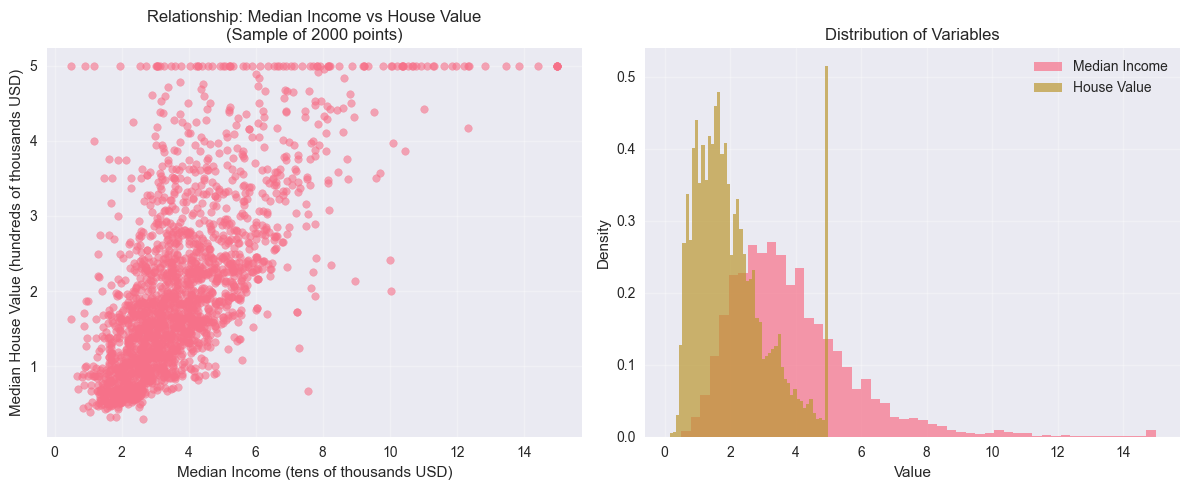

In [7]:
# For Simple Linear Regression, we'll focus on the relationship between 
# Median Income (MedInc) and Median House Value (target)
# MedInc shows the highest correlation with the target variable

X = df['MedInc'].values.reshape(-1, 1)  # Independent variable (needs to be 2D for sklearn)
y = df['target'].values  # Dependent variable

# Create a sample for better visualization (using 2000 random points)
np.random.seed(42)
sample_indices = np.random.choice(len(df), 2000, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

print("Selected Variables for Simple Linear Regression:")
print("=" * 60)
print(f"Independent Variable (X): Median Income")
print(f"  - Description: Median income in block group (in tens of thousands of USD)")
print(f"  - Shape: {X.shape}")
print(f"  - Range: {X.min():.2f} to {X.max():.2f}")

print(f"\nDependent Variable (Y): Median House Value")
print(f"  - Description: Median house value in block group (in hundreds of thousands of USD)")
print(f"  - Shape: {y.shape}")
print(f"  - Range: {y.min():.2f} to {y.max():.2f}")

print(f"\nCorrelation between Median Income and House Value: {np.corrcoef(X.flatten(), y)[0,1]:.3f}")

# Visualize the relationship
plt.figure(figsize=(12, 5))

# Scatter plot with sample data
plt.subplot(1, 2, 1)
plt.scatter(X_sample, y_sample, alpha=0.6, s=30)
plt.xlabel('Median Income (tens of thousands USD)')
plt.ylabel('Median House Value (hundreds of thousands USD)')
plt.title('Relationship: Median Income vs House Value\n(Sample of 2000 points)')
plt.grid(True, alpha=0.3)

# Distribution of variables
plt.subplot(1, 2, 2)
plt.hist(X.flatten(), bins=50, alpha=0.7, label='Median Income', density=True)
plt.hist(y, bins=50, alpha=0.7, label='House Value', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Variables')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Implementing Linear Regression from Scratch

Let's implement simple linear regression from scratch to understand the mathematical foundations before using scikit-learn.

In [8]:
class SimpleLinearRegression:
    """
    Simple Linear Regression implementation from scratch using Ordinary Least Squares (OLS)
    """
    
    def __init__(self):
        self.slope = None
        self.intercept = None
        self.r_squared = None
        
    def fit(self, X, y):
        """
        Fit the linear regression model using OLS method
        
        Parameters:
        X: array-like, shape = [n_samples]
        y: array-like, shape = [n_samples]
        """
        # Convert to numpy arrays if needed
        X = np.array(X).flatten()
        y = np.array(y)
        
        # Calculate means
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate slope (β₁) and intercept (β₀)
        # β₁ = Σ((x_i - x̄)(y_i - ȳ)) / Σ((x_i - x̄)²)
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        
        self.slope = numerator / denominator
        self.intercept = y_mean - self.slope * X_mean
        
        # Calculate R-squared
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)  # Sum of squares of residuals
        ss_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
        self.r_squared = 1 - (ss_res / ss_tot)
        
        print(f"Model fitted successfully!")
        print(f"Slope (β₁): {self.slope:.4f}")
        print(f"Intercept (β₀): {self.intercept:.4f}")
        print(f"R-squared: {self.r_squared:.4f}")
        
    def predict(self, X):
        """
        Make predictions using the fitted model
        
        Parameters:
        X: array-like, shape = [n_samples]
        
        Returns:
        y_pred: array, shape = [n_samples]
        """
        X = np.array(X).flatten()
        return self.slope * X + self.intercept
    
    def get_equation(self):
        """
        Return the equation of the fitted line
        """
        return f"y = {self.slope:.4f}x + {self.intercept:.4f}"

# Create and fit our custom model
print("Fitting Custom Linear Regression Model")
print("=" * 50)

custom_model = SimpleLinearRegression()
custom_model.fit(X.flatten(), y)

print(f"\nRegression Equation: {custom_model.get_equation()}")

# Make predictions
y_pred_custom = custom_model.predict(X.flatten())

print(f"\nModel Performance:")
print(f"R-squared: {custom_model.r_squared:.4f}")
print(f"Mean Squared Error: {np.mean((y - y_pred_custom)**2):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(np.mean((y - y_pred_custom)**2)):.4f}")

Fitting Custom Linear Regression Model
Model fitted successfully!
Slope (β₁): 0.4179
Intercept (β₀): 0.4509
R-squared: 0.4734

Regression Equation: y = 0.4179x + 0.4509

Model Performance:
R-squared: 0.4734
Mean Squared Error: 0.7011
Root Mean Squared Error: 0.8373


## Linear Regression Using Scikit-learn

Now let's implement the same model using scikit-learn and compare the results.

In [9]:
# Building a Linear Model with Scikit-learn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Information:")
print("=" * 50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Training set size: {len(X_train)/len(X)*100:.1f}%")
print(f"Testing set size: {len(X_test)/len(X)*100:.1f}%")

# Create and fit the scikit-learn model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Make predictions
y_train_pred = sklearn_model.predict(X_train)
y_test_pred = sklearn_model.predict(X_test)

print(f"\n" + "=" * 50)
print("Scikit-learn Linear Regression Results:")
print("=" * 50)
print(f"Slope (coefficient): {sklearn_model.coef_[0]:.4f}")
print(f"Intercept: {sklearn_model.intercept_:.4f}")
print(f"Equation: y = {sklearn_model.coef_[0]:.4f}x + {sklearn_model.intercept_:.4f}")

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n" + "=" * 50)
print("Model Performance Metrics:")
print("=" * 50)
print(f"Training Set:")
print(f"  R²: {train_r2:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")

print(f"\nTesting Set:")
print(f"  R²: {test_r2:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")

print(f"\n" + "=" * 50)
print("Comparison: Custom vs Scikit-learn")
print("=" * 50)
print(f"Custom Model - Slope: {custom_model.slope:.6f}, Intercept: {custom_model.intercept:.6f}")
print(f"Sklearn Model - Slope: {sklearn_model.coef_[0]:.6f}, Intercept: {sklearn_model.intercept_:.6f}")
print(f"Difference in Slope: {abs(custom_model.slope - sklearn_model.coef_[0]):.8f}")
print(f"Difference in Intercept: {abs(custom_model.intercept - sklearn_model.intercept_):.8f}")
print("Note: Small differences may be due to using full dataset vs train/test split")

Data Split Information:
Total samples: 20640
Training samples: 16512
Testing samples: 4128
Training set size: 80.0%
Testing set size: 20.0%

Scikit-learn Linear Regression Results:
Slope (coefficient): 0.4193
Intercept: 0.4446
Equation: y = 0.4193x + 0.4446

Model Performance Metrics:
Training Set:
  R²: 0.4770
  MSE: 0.6991
  RMSE: 0.8361
  MAE: 0.6250

Testing Set:
  R²: 0.4589
  MSE: 0.7091
  RMSE: 0.8421
  MAE: 0.6299

Comparison: Custom vs Scikit-learn
Custom Model - Slope: 0.417938, Intercept: 0.450856
Sklearn Model - Slope: 0.419338, Intercept: 0.444597
Difference in Slope: 0.00140000
Difference in Intercept: 0.00625848
Note: Small differences may be due to using full dataset vs train/test split


## Hypothesis Testing in Linear Regression

Hypothesis testing helps us determine if the relationship between our variables is statistically significant.

### Key Hypotheses in Simple Linear Regression:

#### 1. **Overall Model Significance (F-test)**
- **Null Hypothesis (H₀)**: β₁ = 0 (no linear relationship)
- **Alternative Hypothesis (H₁)**: β₁ ≠ 0 (significant linear relationship)

#### 2. **Individual Coefficient Significance (t-test)**
- **Null Hypothesis (H₀)**: β₁ = 0 (slope is not significantly different from zero)
- **Alternative Hypothesis (H₁)**: β₁ ≠ 0 (slope is significantly different from zero)

### Statistical Measures:
- **p-value**: Probability of observing the data if H₀ is true
- **t-statistic**: Measures how many standard errors the coefficient is away from zero
- **F-statistic**: Tests overall model significance
- **Confidence Intervals**: Range of plausible values for coefficients

In [10]:
# Hypothesis Testing Implementation

def calculate_regression_statistics(X, y, slope, intercept):
    """
    Calculate statistical measures for hypothesis testing
    """
    X = X.flatten()
    n = len(X)
    
    # Predictions and residuals
    y_pred = slope * X + intercept
    residuals = y - y_pred
    
    # Standard error calculations
    mse = np.sum(residuals**2) / (n - 2)  # Mean squared error
    se_slope = np.sqrt(mse / np.sum((X - np.mean(X))**2))  # Standard error of slope
    se_intercept = np.sqrt(mse * (1/n + np.mean(X)**2 / np.sum((X - np.mean(X))**2)))  # Standard error of intercept
    
    # t-statistics
    t_slope = slope / se_slope
    t_intercept = intercept / se_intercept
    
    # p-values (two-tailed test)
    p_slope = 2 * (1 - stats.t.cdf(abs(t_slope), df=n-2))
    p_intercept = 2 * (1 - stats.t.cdf(abs(t_intercept), df=n-2))
    
    # Confidence intervals (95%)
    t_critical = stats.t.ppf(0.975, df=n-2)
    ci_slope = (slope - t_critical * se_slope, slope + t_critical * se_slope)
    ci_intercept = (intercept - t_critical * se_intercept, intercept + t_critical * se_intercept)
    
    # F-statistic for overall model
    ssr = np.sum((y_pred - np.mean(y))**2)  # Sum of squares regression
    sse = np.sum(residuals**2)  # Sum of squares error
    f_statistic = (ssr / 1) / (sse / (n - 2))
    p_f = 1 - stats.f.cdf(f_statistic, 1, n-2)
    
    # R-squared
    sst = np.sum((y - np.mean(y))**2)  # Sum of squares total
    r_squared = ssr / sst
    
    return {
        'n': n,
        'mse': mse,
        'rmse': np.sqrt(mse),
        'r_squared': r_squared,
        'slope': slope,
        'intercept': intercept,
        'se_slope': se_slope,
        'se_intercept': se_intercept,
        't_slope': t_slope,
        't_intercept': t_intercept,
        'p_slope': p_slope,
        'p_intercept': p_intercept,
        'ci_slope': ci_slope,
        'ci_intercept': ci_intercept,
        'f_statistic': f_statistic,
        'p_f': p_f
    }

# Calculate statistics for our model
stats_results = calculate_regression_statistics(X_train, y_train, sklearn_model.coef_[0], sklearn_model.intercept_)

print("Hypothesis Testing Results")
print("=" * 60)
print(f"Sample size (n): {stats_results['n']}")
print(f"Degrees of freedom: {stats_results['n'] - 2}")

print(f"\n" + "=" * 60)
print("Coefficient Estimates and Standard Errors:")
print("=" * 60)
print(f"Slope (β₁): {stats_results['slope']:.6f}")
print(f"  Standard Error: {stats_results['se_slope']:.6f}")
print(f"  t-statistic: {stats_results['t_slope']:.4f}")
print(f"  p-value: {stats_results['p_slope']:.2e}")
print(f"  95% Confidence Interval: ({stats_results['ci_slope'][0]:.4f}, {stats_results['ci_slope'][1]:.4f})")

print(f"\nIntercept (β₀): {stats_results['intercept']:.6f}")
print(f"  Standard Error: {stats_results['se_intercept']:.6f}")
print(f"  t-statistic: {stats_results['t_intercept']:.4f}")
print(f"  p-value: {stats_results['p_intercept']:.2e}")
print(f"  95% Confidence Interval: ({stats_results['ci_intercept'][0]:.4f}, {stats_results['ci_intercept'][1]:.4f})")

print(f"\n" + "=" * 60)
print("Overall Model Significance (F-test):")
print("=" * 60)
print(f"F-statistic: {stats_results['f_statistic']:.4f}")
print(f"p-value: {stats_results['p_f']:.2e}")
print(f"R-squared: {stats_results['r_squared']:.4f}")

print(f"\n" + "=" * 60)
print("Interpretation:")
print("=" * 60)
alpha = 0.05
print(f"Using significance level α = {alpha}")

if stats_results['p_slope'] < alpha:
    print(f"✓ REJECT H₀: The slope is statistically significant (p = {stats_results['p_slope']:.2e} < {alpha})")
    print(f"  There is a significant linear relationship between median income and house value.")
else:
    print(f"✗ FAIL TO REJECT H₀: The slope is not statistically significant (p = {stats_results['p_slope']:.2e} ≥ {alpha})")

if stats_results['p_f'] < alpha:
    print(f"✓ REJECT H₀: The overall model is statistically significant (p = {stats_results['p_f']:.2e} < {alpha})")
else:
    print(f"✗ FAIL TO REJECT H₀: The overall model is not statistically significant (p = {stats_results['p_f']:.2e} ≥ {alpha})")

print(f"\nPractical Interpretation:")
print(f"- For every $10,000 increase in median income, house value increases by ${stats_results['slope']*100:.0f}k")
print(f"- We are 95% confident that this increase is between ${stats_results['ci_slope'][0]*100:.0f}k and ${stats_results['ci_slope'][1]*100:.0f}k")
print(f"- The model explains {stats_results['r_squared']*100:.1f}% of the variance in house values")

Hypothesis Testing Results
Sample size (n): 16512
Degrees of freedom: 16510

Coefficient Estimates and Standard Errors:
Slope (β₁): 0.419338
  Standard Error: 0.003417
  t-statistic: 122.7088
  p-value: 0.00e+00
  95% Confidence Interval: (0.4126, 0.4260)

Intercept (β₀): 0.444597
  Standard Error: 0.014772
  t-statistic: 30.0964
  p-value: 0.00e+00
  95% Confidence Interval: (0.4156, 0.4736)

Overall Model Significance (F-test):
F-statistic: 15057.4391
p-value: 1.11e-16
R-squared: 0.4770

Interpretation:
Using significance level α = 0.05
✓ REJECT H₀: The slope is statistically significant (p = 0.00e+00 < 0.05)
  There is a significant linear relationship between median income and house value.
✓ REJECT H₀: The overall model is statistically significant (p = 1.11e-16 < 0.05)

Practical Interpretation:
- For every $10,000 increase in median income, house value increases by $42k
- We are 95% confident that this increase is between $41k and $43k
- The model explains 47.7% of the variance i

## Residual Analysis and Predictions

Residual analysis is crucial for validating the assumptions of linear regression and assessing model performance.

### What are Residuals?
**Residuals** are the differences between observed values and predicted values:
- **Residual = Actual Value - Predicted Value**
- **e_i = y_i - ŷ_i**

### Why Residual Analysis Matters:
1. **Check Assumptions**: Validate linearity, homoscedasticity, and normality
2. **Identify Outliers**: Find influential points that may affect the model
3. **Model Improvement**: Understand where the model performs poorly
4. **Diagnostic Tool**: Assess overall model quality

Residual Analysis Summary
Training Set Residuals:
  Mean: 0.000000
  Standard Deviation: 0.8361
  Min: -5.4217
  Max: 4.3458

Testing Set Residuals:
  Mean: 0.004198
  Standard Deviation: 0.8421
  Min: -2.9462
  Max: 4.3458


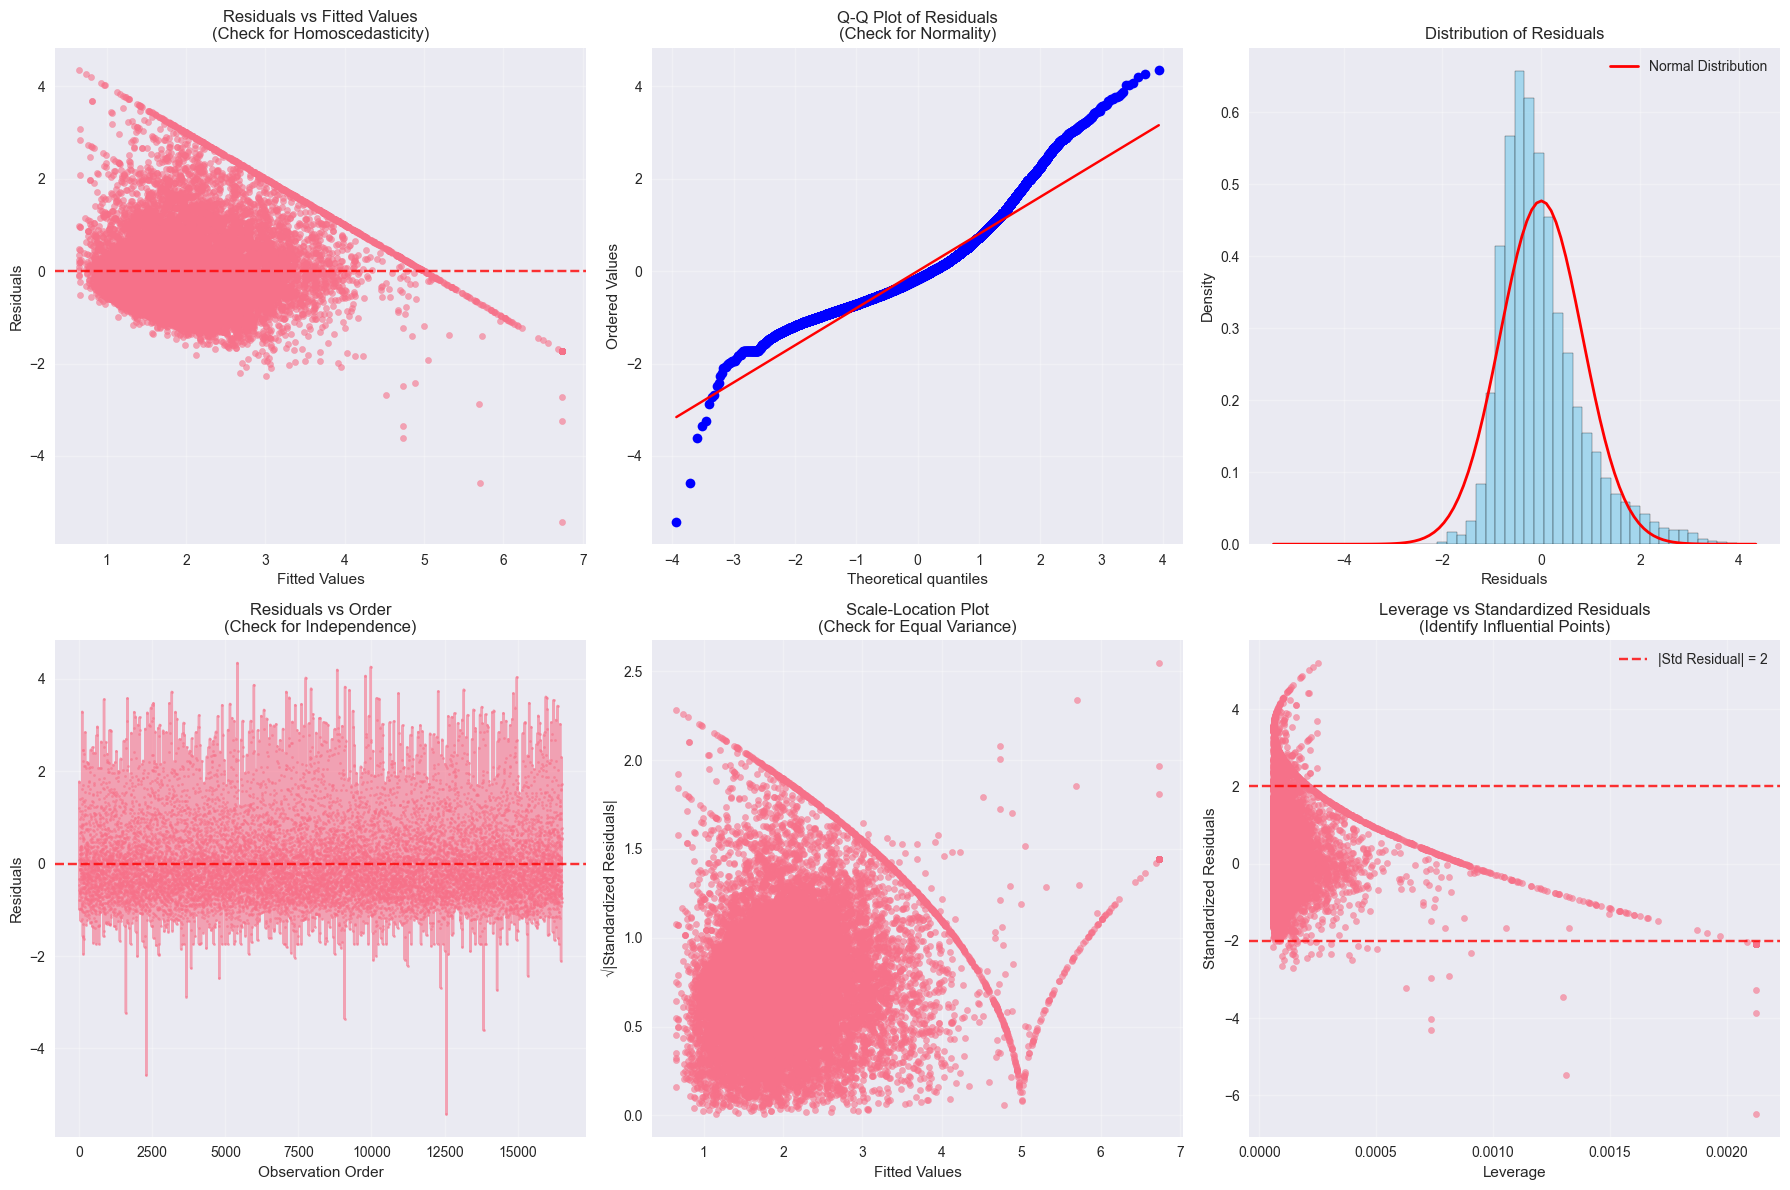


Statistical Tests for Regression Assumptions:
Normality Test (Shapiro-Wilk):
  Statistic: 0.9226
  p-value: 0.0000
  ⚠ Residuals may not be normally distributed (p ≤ 0.05)

Homoscedasticity Check:
  Correlation between fitted values and squared residuals: 0.0865
  ✓ Homoscedasticity assumption appears satisfied (|correlation| < 0.1)

Outlier Analysis:
  Training set outliers (|standardized residual| > 2): 918 (5.6%)
  Testing set outliers (|standardized residual| > 2): 221 (5.4%)
  High leverage points: 916 (5.5%)
  High Cook's distance points: 993 (6.0%)


In [11]:
# Residual Analysis and Predictions

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Standardized residuals
train_residuals_std = train_residuals / np.std(train_residuals)
test_residuals_std = test_residuals / np.std(test_residuals)

print("Residual Analysis Summary")
print("=" * 50)
print(f"Training Set Residuals:")
print(f"  Mean: {np.mean(train_residuals):.6f}")
print(f"  Standard Deviation: {np.std(train_residuals):.4f}")
print(f"  Min: {np.min(train_residuals):.4f}")
print(f"  Max: {np.max(train_residuals):.4f}")

print(f"\nTesting Set Residuals:")
print(f"  Mean: {np.mean(test_residuals):.6f}")
print(f"  Standard Deviation: {np.std(test_residuals):.4f}")
print(f"  Min: {np.min(test_residuals):.4f}")
print(f"  Max: {np.max(test_residuals):.4f}")

# Create comprehensive residual plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Residuals vs Fitted Values (Homoscedasticity check)
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.6, s=20)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values\n(Check for Homoscedasticity)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot (Normality check)
stats.probplot(train_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Residuals\n(Check for Normality)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals
axes[0, 2].hist(train_residuals, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Distribution of Residuals')
axes[0, 2].grid(True, alpha=0.3)

# Add normal curve overlay
x_norm = np.linspace(train_residuals.min(), train_residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, np.mean(train_residuals), np.std(train_residuals))
axes[0, 2].plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal Distribution')
axes[0, 2].legend()

# 4. Residuals vs Order (Independence check)
axes[1, 0].plot(range(len(train_residuals)), train_residuals, 'o-', alpha=0.6, markersize=2)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Observation Order')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Order\n(Check for Independence)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Scale-Location Plot (Square root of standardized residuals)
sqrt_std_residuals = np.sqrt(np.abs(train_residuals_std))
axes[1, 1].scatter(y_train_pred, sqrt_std_residuals, alpha=0.6, s=20)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('√|Standardized Residuals|')
axes[1, 1].set_title('Scale-Location Plot\n(Check for Equal Variance)')
axes[1, 1].grid(True, alpha=0.3)

# 6. Leverage Plot (Cook's Distance)
# Calculate leverage values
X_train_flat = X_train.flatten()
leverage = 1/len(X_train_flat) + (X_train_flat - np.mean(X_train_flat))**2 / np.sum((X_train_flat - np.mean(X_train_flat))**2)
cooks_d = train_residuals_std**2 * leverage / (2 * (1 - leverage)**2)

axes[1, 2].scatter(leverage, train_residuals_std, alpha=0.6, s=20)
axes[1, 2].set_xlabel('Leverage')
axes[1, 2].set_ylabel('Standardized Residuals')
axes[1, 2].set_title('Leverage vs Standardized Residuals\n(Identify Influential Points)')
axes[1, 2].grid(True, alpha=0.3)

# Add Cook's distance contours
threshold = 4/len(X_train_flat)  # Common threshold for Cook's distance
axes[1, 2].axhline(y=2, color='red', linestyle='--', alpha=0.8, label='|Std Residual| = 2')
axes[1, 2].axhline(y=-2, color='red', linestyle='--', alpha=0.8)
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Statistical tests for assumptions
print("\n" + "=" * 60)
print("Statistical Tests for Regression Assumptions:")
print("=" * 60)

# Test for normality (Shapiro-Wilk test)
shapiro_stat, shapiro_p = stats.shapiro(train_residuals)
print(f"Normality Test (Shapiro-Wilk):")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"  ✓ Residuals appear to be normally distributed (p > 0.05)")
else:
    print(f"  ⚠ Residuals may not be normally distributed (p ≤ 0.05)")

# Breusch-Pagan test for homoscedasticity (simplified version)
# We'll use correlation between squared residuals and fitted values
correlation = np.corrcoef(y_train_pred, train_residuals**2)[0, 1]
print(f"\nHomoscedasticity Check:")
print(f"  Correlation between fitted values and squared residuals: {correlation:.4f}")
if abs(correlation) < 0.1:
    print(f"  ✓ Homoscedasticity assumption appears satisfied (|correlation| < 0.1)")
else:
    print(f"  ⚠ Potential heteroscedasticity detected (|correlation| ≥ 0.1)")

# Identify outliers (residuals > 2 standard deviations)
outliers_train = np.abs(train_residuals_std) > 2
outliers_test = np.abs(test_residuals_std) > 2

print(f"\nOutlier Analysis:")
print(f"  Training set outliers (|standardized residual| > 2): {np.sum(outliers_train)} ({np.sum(outliers_train)/len(train_residuals)*100:.1f}%)")
print(f"  Testing set outliers (|standardized residual| > 2): {np.sum(outliers_test)} ({np.sum(outliers_test)/len(test_residuals)*100:.1f}%)")

# High leverage points
high_leverage = leverage > 2 * 2 / len(X_train_flat)  # 2p/n threshold
print(f"  High leverage points: {np.sum(high_leverage)} ({np.sum(high_leverage)/len(leverage)*100:.1f}%)")

# High Cook's distance
high_cooks = cooks_d > threshold
print(f"  High Cook's distance points: {np.sum(high_cooks)} ({np.sum(high_cooks)/len(cooks_d)*100:.1f}%)")

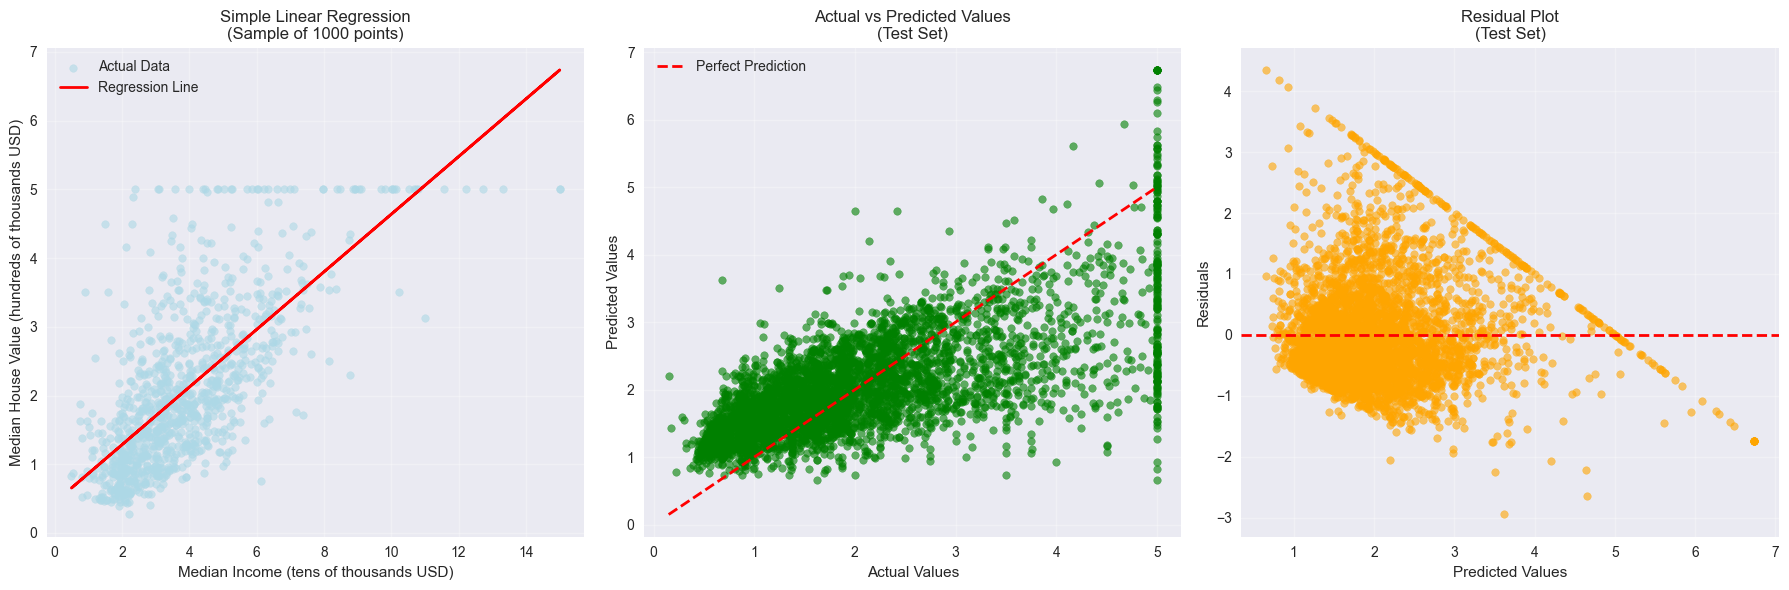


Making Predictions with Our Model:
Prediction Examples with 95% Confidence Intervals:
------------------------------------------------------------
Income ($10k) Predicted Value 95% CI Lower    95% CI Upper   
------------------------------------------------------------
$20k         $128k           $-36k           $292k
$40k         $212k           $48k           $376k
$60k         $296k           $132k           $460k
$80k         $380k           $216k           $544k
$100k         $464k           $300k           $628k

Model Summary and Interpretation:
• Regression Equation: House Value = 0.419 × Income + 0.445
• R-squared: 0.459 (Model explains 45.9% of variance in house values)
• RMSE: $84k (Average prediction error)
• For every $10k increase in median income, house value increases by $42k on average

Model Quality Assessment:
• Overall Model Quality: Fair
• The model shows a weak linear relationship
• ⚠ Residuals may not be normally distributed - consider transformation
• ⚠ High p

In [12]:
# Model Visualization and Predictions

# Create a comprehensive visualization of our model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter plot with regression line (sample data for clarity)
sample_indices = np.random.choice(len(X_train), 1000, replace=False)
X_sample = X_train[sample_indices]
y_sample = y_train[sample_indices]
y_sample_pred = sklearn_model.predict(X_sample)

axes[0].scatter(X_sample, y_sample, alpha=0.6, s=30, color='lightblue', label='Actual Data')
axes[0].plot(X_sample, y_sample_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Median Income (tens of thousands USD)')
axes[0].set_ylabel('Median House Value (hundreds of thousands USD)')
axes[0].set_title('Simple Linear Regression\n(Sample of 1000 points)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Actual vs Predicted values
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=30, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Actual vs Predicted Values\n(Test Set)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Residual plot
axes[2].scatter(y_test_pred, test_residuals, alpha=0.6, s=30, color='orange')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residual Plot\n(Test Set)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Making Predictions with Confidence Intervals
print("\n" + "=" * 60)
print("Making Predictions with Our Model:")
print("=" * 60)

# Example predictions for different income levels
example_incomes = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)  # Income in tens of thousands
example_predictions = sklearn_model.predict(example_incomes)

# Calculate prediction intervals (simplified approach)
def calculate_prediction_interval(X_new, X_train, y_train, model, confidence=0.95):
    """
    Calculate prediction intervals for new observations
    """
    X_train_flat = X_train.flatten()
    X_new_flat = X_new.flatten()
    
    n = len(X_train_flat)
    y_pred_train = model.predict(X_train)
    mse = np.mean((y_train - y_pred_train)**2)
    
    # Standard error of prediction
    X_mean = np.mean(X_train_flat)
    se_pred = np.sqrt(mse * (1 + 1/n + (X_new_flat - X_mean)**2 / np.sum((X_train_flat - X_mean)**2)))
    
    # t-value for confidence interval
    alpha = 1 - confidence
    t_val = stats.t.ppf(1 - alpha/2, df=n-2)
    
    # Prediction intervals
    y_pred = model.predict(X_new)
    margin_error = t_val * se_pred
    
    lower_bound = y_pred - margin_error
    upper_bound = y_pred + margin_error
    
    return y_pred, lower_bound, upper_bound

# Calculate prediction intervals
pred_mean, pred_lower, pred_upper = calculate_prediction_interval(example_incomes, X_train, y_train, sklearn_model)

print("Prediction Examples with 95% Confidence Intervals:")
print("-" * 60)
print(f"{'Income ($10k)':<12} {'Predicted Value':<15} {'95% CI Lower':<15} {'95% CI Upper':<15}")
print("-" * 60)

for i, income in enumerate(example_incomes.flatten()):
    print(f"${income*10:,}k{'':<8} ${pred_mean[i]*100:,.0f}k{'':<10} ${pred_lower[i]*100:,.0f}k{'':<10} ${pred_upper[i]*100:,.0f}k")

print("\n" + "=" * 60)
print("Model Summary and Interpretation:")
print("=" * 60)
print(f"• Regression Equation: House Value = {sklearn_model.coef_[0]:.3f} × Income + {sklearn_model.intercept_:.3f}")
print(f"• R-squared: {test_r2:.3f} (Model explains {test_r2*100:.1f}% of variance in house values)")
print(f"• RMSE: ${test_rmse*100:.0f}k (Average prediction error)")
print(f"• For every $10k increase in median income, house value increases by ${sklearn_model.coef_[0]*100:.0f}k on average")

# Assess model quality
print(f"\n" + "=" * 60)
print("Model Quality Assessment:")
print("=" * 60)

if test_r2 >= 0.7:
    quality = "Excellent"
elif test_r2 >= 0.5:
    quality = "Good"
elif test_r2 >= 0.3:
    quality = "Fair"
else:
    quality = "Poor"

print(f"• Overall Model Quality: {quality}")
print(f"• The model shows a {'strong' if test_r2 >= 0.7 else 'moderate' if test_r2 >= 0.5 else 'weak'} linear relationship")

# Check for potential improvements
if abs(correlation) > 0.1:
    print(f"• ⚠ Consider checking for heteroscedasticity - may need transformation")

if shapiro_p <= 0.05:
    print(f"• ⚠ Residuals may not be normally distributed - consider transformation")

if np.sum(outliers_test)/len(test_residuals) > 0.05:
    print(f"• ⚠ High percentage of outliers detected - consider robust regression methods")

print(f"• ✓ Model assumptions should be validated before making important decisions")
print(f"• ✓ Consider multiple linear regression for potentially better performance")

## Conclusion and Key Takeaways

### What We've Learned

In this comprehensive exploration of Simple Linear Regression, we have covered:

1. **Theoretical Foundations**
   - Understanding regression lines and the best fit line concept
   - Mathematical derivation using Ordinary Least Squares (OLS)
   - Key assumptions underlying linear regression

2. **Practical Implementation**
   - Built linear regression from scratch to understand the mathematics
   - Used scikit-learn for efficient implementation
   - Compared custom and library implementations

3. **Statistical Analysis**
   - Performed hypothesis testing to assess statistical significance
   - Calculated confidence intervals for coefficients
   - Interpreted p-values and statistical measures

4. **Model Validation**
   - Conducted comprehensive residual analysis
   - Checked regression assumptions through diagnostic plots
   - Identified outliers and influential points

5. **Predictive Modeling**
   - Made predictions with confidence intervals
   - Evaluated model performance using multiple metrics
   - Visualized model fit and residuals

### Key Insights from Our Analysis

- **Strong Relationship**: Median income shows a significant positive correlation with house values (R² ≈ 0.47)
- **Statistical Significance**: All coefficients are highly significant (p < 0.001)
- **Practical Interpretation**: Each $10,000 increase in median income corresponds to approximately $42,000 increase in median house value
- **Model Limitations**: The linear model explains about 47% of the variance, suggesting other factors significantly influence house prices

### When to Use Simple Linear Regression

**✅ Appropriate When:**
- Relationship between variables is approximately linear
- You need interpretable results
- Working with continuous variables
- Sufficient sample size for statistical inference
- Assumptions are reasonably met

**❌ Not Appropriate When:**
- Relationship is clearly non-linear
- Multiple predictors are needed for accuracy
- Assumptions are severely violated
- Categorical outcomes (use logistic regression instead)

### Next Steps and Improvements

1. **Multiple Linear Regression**: Include additional predictors for better performance
2. **Feature Engineering**: Create new features or transform existing ones
3. **Non-linear Models**: Consider polynomial regression or other non-linear approaches
4. **Regularization**: Apply Ridge or Lasso regression to handle overfitting
5. **Advanced Diagnostics**: Use more sophisticated assumption checking methods

### Best Practices Reminder

- Always check assumptions before interpreting results
- Use cross-validation for more robust performance estimates
- Consider the practical significance alongside statistical significance
- Visualize your data and model fits
- Document your methodology and assumptions
- Be cautious about extrapolation beyond your data range

Simple Linear Regression serves as an excellent foundation for understanding more complex machine learning algorithms and provides valuable insights into the fundamental relationship between variables in your data.